In [2]:
try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0-rc1


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2019-12-29 19:34:57--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2019-12-29 19:34:57 (59.0 MB/s) - ‘moore.csv’ saved [2302/2302]



In [27]:
!ls

moore.csv  sample_data


In [7]:
# To confirm there is no header
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [8]:
df_data = pd.read_csv('moore.csv', header=None)
df_data.head()

,0,1
0,1971,2300
1,1972,3500
2,1973,2500
3,1973,2500
4,1974,4100


In [0]:
# columns = ['Year', 'No of transistors']
# df_data.columns = columns
# df_data.head()

# 	Year	No of transistors
# 0	1971	2300
# 1	1972	3500
# 2	1973	2500
# 3	1973	2500
# 4	1974	4100

In [0]:
X = df_data[0]
Y = df_data[1]
# X.shape           (162,)
# Y.shape           (162,)

X = df_data[0].values
Y = df_data[1].values
# X.shape           (162,)
# Y.shape           (162,)

X = X.reshape(-1,1)
# X.shape           (162, 1)

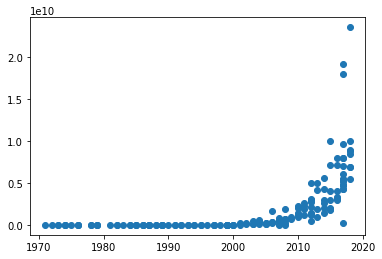

In [11]:
plt.scatter(X, Y)

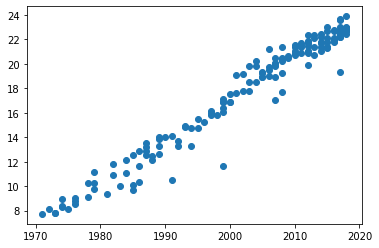

In [12]:
Y = np.log(Y)
plt.scatter(X, Y)

In [0]:
# Let's also center the X data so the values are not too large
# We could scale it too but then we'd have to reverse the transformation later
X = X - X.mean()

In [0]:
model = Sequential()
model.add(Dense(1, input_dim=1))

In [0]:
model.compile(
    loss = 'mean_squared_error',
    optimizer = tf.keras.optimizers.SGD(0.001, 0.9)
)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [17]:
r = model.fit(X, Y, epochs=100)

Train on 162 samples
Epoch 1/100
162/162 [==============================] - 2s 12ms/sample - loss: 315.1211
Epoch 2/100
162/162 [==============================] - 0s 123us/sample - loss: 302.4781
Epoch 3/100
162/162 [==============================] - 0s 118us/sample - loss: 264.7701
Epoch 4/100
162/162 [==============================] - 0s 110us/sample - loss: 247.6246
Epoch 5/100
162/162 [==============================] - 0s 107us/sample - loss: 158.6362
Epoch 6/100
162/162 [==============================] - 0s 106us/sample - loss: 158.1998
Epoch 7/100
162/162 [==============================] - 0s 106us/sample - loss: 130.4495
Epoch 8/100
162/162 [==============================] - 0s 94us/sample - loss: 97.2389
Epoch 9/100
162/162 [==============================] - 0s 111us/sample - loss: 96.0380
Epoch 10/100
162/162 [==============================] - 0s 114us/sample - loss: 45.5872
Epoch 11/100
162/162 [==============================] - 0s 95us/sample - loss: 43.9336
Epoch 12/100
162

Text(0.5, 1.0, 'Training Loss')

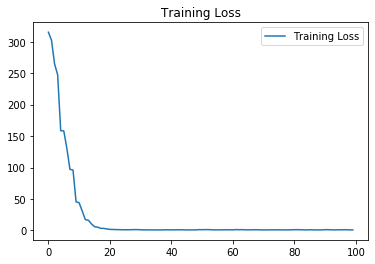

In [18]:
plt.plot(r.history['loss'], label = 'Training Loss')
plt.legend()
plt.title('Training Loss')

In [19]:
model.layers      # Note: there is only 1 layer, the "Input" layer doesn't count

In [20]:
model.get_weights()

[array([[0.33353472]], dtype=float32), array([17.729988], dtype=float32)]

In [21]:
model.layers[0].get_weights()

[array([[0.33353472]], dtype=float32), array([17.729988], dtype=float32)]

**Prediction**

In [34]:
# Y.shape            (162,)
Yhat = model.predict(X)
print(Yhat)
# Yhat.shape         (162, 1)

[[ 7.3245287]
 [ 7.658063 ]
 [ 7.991598 ]
 [ 7.991598 ]
 [ 8.325132 ]
 [ 8.325132 ]
 [ 8.325132 ]
 [ 8.658668 ]
 [ 8.992202 ]
 [ 8.992202 ]
 [ 8.992202 ]
 [ 9.659271 ]
 [ 9.659271 ]
 [ 9.992806 ]
 [ 9.992806 ]
 [ 9.992806 ]
 [10.659876 ]
 [10.99341  ]
 [10.99341  ]
 [11.326945 ]
 [11.6604805]
 [11.6604805]
 [11.994015 ]
 [11.994015 ]
 [11.994015 ]
 [12.327549 ]
 [12.327549 ]
 [12.327549 ]
 [12.661084 ]
 [12.661084 ]
 [12.661084 ]
 [12.661084 ]
 [12.994619 ]
 [12.994619 ]
 [13.328154 ]
 [13.328154 ]
 [13.328154 ]
 [13.328154 ]
 [13.661688 ]
 [13.995223 ]
 [13.995223 ]
 [14.328757 ]
 [14.328757 ]
 [14.6622925]
 [14.6622925]
 [14.995827 ]
 [14.995827 ]
 [15.329362 ]
 [16.6635   ]
 [15.329362 ]
 [15.662896 ]
 [15.996431 ]
 [15.996431 ]
 [15.996431 ]
 [16.329966 ]
 [16.6635   ]
 [16.6635   ]
 [16.997036 ]
 [16.997036 ]
 [16.6635   ]
 [16.6635   ]
 [16.6635   ]
 [16.997036 ]
 [17.33057  ]
 [17.33057  ]
 [17.664104 ]
 [18.331175 ]
 [18.331175 ]
 [18.66471  ]
 [18.998243 ]
 [18.66471  ]
 [18.9

In [42]:
Yhat = Yhat.flatten()
print(Yhat)
# Yhat.shape            (162,)

[ 7.3245287  7.658063   7.991598   7.991598   8.325132   8.325132
  8.325132   8.658668   8.992202   8.992202   8.992202   9.659271
  9.659271   9.992806   9.992806   9.992806  10.659876  10.99341
 10.99341   11.326945  11.6604805 11.6604805 11.994015  11.994015
 11.994015  12.327549  12.327549  12.327549  12.661084  12.661084
 12.661084  12.661084  12.994619  12.994619  13.328154  13.328154
 13.328154  13.328154  13.661688  13.995223  13.995223  14.328757
 14.328757  14.6622925 14.6622925 14.995827  14.995827  15.329362
 16.6635    15.329362  15.662896  15.996431  15.996431  15.996431
 16.329966  16.6635    16.6635    16.997036  16.997036  16.6635
 16.6635    16.6635    16.997036  17.33057   17.33057   17.664104
 18.331175  18.331175  18.66471   18.998243  18.66471   18.998243
 19.331778  19.665314  17.997639  17.997639  17.664104  18.66471
 18.66471   18.998243  19.331778  17.997639  19.665314  19.998848
 20.665916  20.999453  19.331778  19.331778  19.665314  18.331175
 19.331778  19

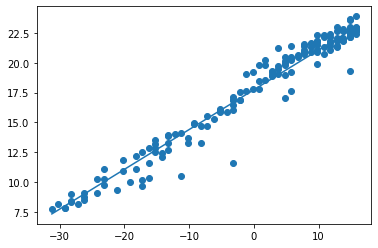

In [41]:
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [48]:
w, b = model.get_weights()
Yhat2 = (X.dot(w) + b).flatten()
np.allclose(Yhat, Yhat2)      # can't used == when checking equality of floating numbers

True